In [76]:
#Importing important libraries
import pymongo
import pandas as pd
import json
import numpy as np
from pymongo import MongoClient

In [77]:
#Importing the dataset and reading it
fligts_statistics = pd.read_csv("Air_Traffic_Landings_Statistics - Copy.csv")
fligts_statistics.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000


In [78]:
#Connecting to mongo db
db_client = pymongo.MongoClient("mongodb://localhost:27017/")
#Creating the database
db = db_client.Flight_details
collection = db.test_collection
document=collection.insert_many(fligts_statistics.to_dict('r'))

C:\Users\gogat\AppData\Local\Temp\ipykernel_16340\3847226230.py:6: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  document=collection.insert_many(fligts_statistics.to_dict('r'))


In [79]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [80]:
#Just making sure that, its saved in DB
x = collection.find_one()
print(x)

{'_id': ObjectId('644a600c6b7d541964d8758d'), 'Activity Period': 200507, 'Operating Airline': 'ABX Air', 'Operating Airline IATA Code': 'GB', 'Published Airline': 'ABX Air', 'Published Airline IATA Code': 'GB', 'GEO Summary': 'Domestic', 'GEO Region': 'US', 'Landing Aircraft Type': 'Freighter', 'Aircraft Body Type': 'Narrow Body', 'Aircraft Manufacturer': 'McDonnell Douglas', 'Aircraft Model': 'DC-9', 'Aircraft Version': '30', 'Landing Count': 40, 'Total Landed Weight': 4066000}


In [81]:
#Fetching the dataset from mongodb into dataframes
Data_from_db = pd.DataFrame(list(collection.find()))
Data_from_db

,_id,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,644a600c6b7d541964d8758d,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000
1,644a600c6b7d541964d8758e,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000
2,644a600c6b7d541964d8758f,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000
3,644a600c6b7d541964d87590,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,644a600c6b7d541964d87591,200507,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114757,644ac5fd6b7d541964da35d3,202212,Vietnam Airlines JSC,VN,Vietnam Airlines JSC,VN,International,Asia,Passenger,Wide Body,Airbus,A359,-,17,7758069
114758,644ac5fd6b7d541964da35d4,202212,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Passenger,Wide Body,Boeing,B789,-,31,13175000
114759,644ac5fd6b7d541964da35d5,202212,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Passenger,Narrow Body,Boeing,B38M,-,5,764000
114760,644ac5fd6b7d541964da35d6,202212,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Passenger,Narrow Body,Boeing,B737,-,5,646000


In [82]:
#We could see there is a _id field which is system generated, as we dont need it, will fetch the values excluding it.
Data_from_db = pd.DataFrame(list(collection.find({}, {'_id': 0})))
Data_from_db

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114757,202212,Vietnam Airlines JSC,VN,Vietnam Airlines JSC,VN,International,Asia,Passenger,Wide Body,Airbus,A359,-,17,7758069
114758,202212,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Passenger,Wide Body,Boeing,B789,-,31,13175000
114759,202212,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Passenger,Narrow Body,Boeing,B38M,-,5,764000
114760,202212,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Passenger,Narrow Body,Boeing,B737,-,5,646000


In [83]:
#Now we have the data ready fetched from mongoDB.
#Lets find more about the data
#Information
Data_from_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114762 entries, 0 to 114761
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Activity Period              114762 non-null  int64 
 1   Operating Airline            114762 non-null  object
 2   Operating Airline IATA Code  114250 non-null  object
 3   Published Airline            114762 non-null  object
 4   Published Airline IATA Code  114250 non-null  object
 5   GEO Summary                  114762 non-null  object
 6   GEO Region                   114762 non-null  object
 7   Landing Aircraft Type        114762 non-null  object
 8   Aircraft Body Type           114762 non-null  object
 9   Aircraft Manufacturer        114728 non-null  object
 10  Aircraft Model               114762 non-null  object
 11  Aircraft Version             110130 non-null  object
 12  Landing Count                114762 non-null  int64 
 13  Total Landed W

In [84]:
#Getting the summary of the dataset
Data_from_db.describe(include=[object, np.number])

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
count,114762.000000,114762,114250,114762,114250,114762,114762,114762,114762,114728,114762,110130,114762.000000,1.147620e+05
unique,NaN,121,106,111,97,2,10,3,4,18,104,90,NaN,NaN
top,NaN,United Airlines,UA,United Airlines,UA,International,US,Passenger,Wide Body,Boeing,737,-,NaN,NaN
freq,NaN,16682,24018,19216,28312,60404,54592,101574,55022,68970,12538,54320,NaN,NaN
mean,201384.769540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.216082,1.841790e+07
std,494.504371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.263036,2.941371e+07
min,200507.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,6.850000e+03
25%,201001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,2.948000e+06
50%,201406.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,9.313000e+06
75%,201806.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.000000,1.933913e+07


In [85]:
#lets check if there are any duplicate values present in our dataset
duplicate_rows = Data_from_db.duplicated()
print(Data_from_db[duplicate_rows])

        Activity Period     Operating Airline Operating Airline IATA Code  \
132              200507               ABX Air                          GB   
223              200507               ABX Air                          GB   
531              200507          ATA Airlines                          TZ   
1288             200507          ATA Airlines                          TZ   
1685             200507            Air Canada                          AC   
...                 ...                   ...                         ...   
114757           202212  Vietnam Airlines JSC                          VN   
114758           202212       Virgin Atlantic                          VS   
114759           202212      WestJet Airlines                          WS   
114760           202212      WestJet Airlines                          WS   
114761           202212      WestJet Airlines                          WS   

           Published Airline Published Airline IATA Code    GEO Summary  \


Looking at the above result, we could see there are around 28000 duplicate rows, we should remove all those rows because those will lead us to the wrong assumptions and results.

In [86]:
#Deleting the duplicate rows
Data_from_db.drop_duplicates(inplace=True)
#shape of the dataset after deleting the duplicates
print(Data_from_db.shape)

(29243, 14)


In [87]:
#lets find out the emty and missing values
print('Missing Values by Count: \n\n',
      Data_from_db.isnull().sum().sort_values(ascending=True),'\n\nMissing Values by %:\n\n',
      Data_from_db.isnull().sum().sort_values(ascending=True)/Data_from_db.shape[0] * 100)

Missing Values by Count: 

 Activity Period                   0
Operating Airline                 0
Published Airline                 0
GEO Summary                       0
GEO Region                        0
Landing Aircraft Type             0
Aircraft Body Type                0
Aircraft Model                    0
Landing Count                     0
Total Landed Weight               0
Aircraft Manufacturer            17
Operating Airline IATA Code     172
Published Airline IATA Code     172
Aircraft Version               1158
dtype: int64 

Missing Values by %:

 Activity Period                0.000000
Operating Airline              0.000000
Published Airline              0.000000
GEO Summary                    0.000000
GEO Region                     0.000000
Landing Aircraft Type          0.000000
Aircraft Body Type             0.000000
Aircraft Model                 0.000000
Landing Count                  0.000000
Total Landed Weight            0.000000
Aircraft Manufacturer         

So we have missing values in following:
Aircraft Manufacturer            17,
Operating Airline IATA Code     172,
Published Airline IATA Code     172,
Aircraft Version               1158

in this we can ignore "Operating Airline IATA Code" and "Published Airline IATA Code" as that column is not much useful to us from the analysis point of view, so we can delete those columns itself.
In "Aircraft Manufacturer" there only 17 rows missing and its almost 0.05%, so we can just remove those rows.
In "Aircraft Version", there are so many missing values in this and as we need to fill it with some values.
Since its a categorical value, we can replace it with Mode value.

In [88]:
#First will remove "Operating Airline IATA Code" and "Published Airline IATA Code" columns
Data_from_db = Data_from_db.drop(columns=["Operating Airline IATA Code", "Published Airline IATA Code"])

In [89]:
#Removing the rows where "Aircraft Manufacturer" is null
Data_from_db = Data_from_db.dropna(subset=['Aircraft Manufacturer'])

In [90]:
#Since "Aircraft Version" a categorical value, we can replace it with Mode value.
#Finding the mode
mode_value = Data_from_db['Aircraft Version'].mode()[0]
#Replacing the null values with mode
Data_from_db['Aircraft Version'] = Data_from_db['Aircraft Version'].fillna(mode_value)

In [91]:
#Now lets check if there are missing values, just for confirmation.
print('Missing Values by Count: \n\n',
      Data_from_db.isnull().sum().sort_values(ascending=True),'\n\nMissing Values by %:\n\n',
      Data_from_db.isnull().sum().sort_values(ascending=True)/Data_from_db.shape[0] * 100)

Missing Values by Count: 

 Activity Period          0
Operating Airline        0
Published Airline        0
GEO Summary              0
GEO Region               0
Landing Aircraft Type    0
Aircraft Body Type       0
Aircraft Manufacturer    0
Aircraft Model           0
Aircraft Version         0
Landing Count            0
Total Landed Weight      0
dtype: int64 

Missing Values by %:

 Activity Period          0.0
Operating Airline        0.0
Published Airline        0.0
GEO Summary              0.0
GEO Region               0.0
Landing Aircraft Type    0.0
Aircraft Body Type       0.0
Aircraft Manufacturer    0.0
Aircraft Model           0.0
Aircraft Version         0.0
Landing Count            0.0
Total Landed Weight      0.0
dtype: float64


We have dealt with missing values and now our data is ready for next steps and process.

In [92]:
#If we observe the data carefully,"Operating_Airline', 'Published_Airline" are basically same, so we can remove one of the column
Data_from_db = Data_from_db.drop(columns=["Published Airline"])

In [93]:
#removing the spaces from column names to make sure that they dont create problem whilec inserting into database.
Data_from_db.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
print(Data_from_db.columns)

Index(['Activity_Period', 'Operating_Airline', 'GEO_Summary', 'GEO_Region',
       'Landing_Aircraft_Type', 'Aircraft_Body_Type', 'Aircraft_Manufacturer',
       'Aircraft_Model', 'Aircraft_Version', 'Landing_Count',
       'Total_Landed_Weight'],
      dtype='object')


In [94]:
Data_from_db.shape
Data_from_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29226 entries, 0 to 57380
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Activity_Period        29226 non-null  int64 
 1   Operating_Airline      29226 non-null  object
 2   GEO_Summary            29226 non-null  object
 3   GEO_Region             29226 non-null  object
 4   Landing_Aircraft_Type  29226 non-null  object
 5   Aircraft_Body_Type     29226 non-null  object
 6   Aircraft_Manufacturer  29226 non-null  object
 7   Aircraft_Model         29226 non-null  object
 8   Aircraft_Version       29226 non-null  object
 9   Landing_Count          29226 non-null  int64 
 10  Total_Landed_Weight    29226 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [95]:
#Now lets to connect to POSTGRESQL and store the data in the table.
import psycopg2

#connection parameters
Host_name = 'localhost'
Port_number = '5432'  
Database_name = 'Flight_details'  
DB_username = 'postgres'  
DB_password = '8722708378'  

#Connect to the PostgreSQL server
connection = psycopg2.connect(host=Host_name, port=Port_number, dbname=Database_name, user=DB_username, password=DB_password)

# Open a cursor to execute SQL queries
curs = connection.cursor()

#query for creating a table
curs.execute("CREATE TABLE Air_Traffic_Landing_Statistics(Activity_Period         varchar(100),Operating_Airline       varchar(100),GEO_Summary             varchar(100),GEO_Region              varchar(100),Landing_Aircraft_Type   varchar(100),Aircraft_Body_Type      varchar(100),Aircraft_Manufacturer   varchar(100),Aircraft_Model          varchar(100),Aircraft_Version        varchar(100),Landing_Count           varchar(100),Total_Landed_Weight     varchar(100)   ); ")

#inserting the data into postgresql table
for i, row in Data_from_db.iterrows():
    values = tuple(row.values)
    insert_sql = "INSERT INTO Air_Traffic_Landing_Statistics (Activity_Period,Operating_Airline,GEO_Summary,GEO_Region,Landing_Aircraft_Type,Aircraft_Body_Type,Aircraft_Manufacturer,Aircraft_Model,Aircraft_Version,Landing_Count,Total_Landed_Weight) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
    curs.execute(insert_sql, values)
    
#Committing the transaction
connection.commit()

# Closing the cursor and the connection
curs.close()
connection.close()

In [96]:
#Now lets fetch the data from the database

#connection parameters
Host_name = 'localhost'
Port_number = '5432'  
Database_name = 'Flight_details'  
DB_username = 'postgres'  
DB_password = '8722708378'  

#Connect to the PostgreSQL server
connection = psycopg2.connect(host=Host_name, port=Port_number, dbname=Database_name, user=DB_username, password=DB_password)

#query for fetching all the data from the table
query="select * from Air_Traffic_Landing_Statistics;"

#fetching the data using a query
fetched_data = pd.read_sql(query, connection)    

#Closing the connection
connection.close()

C:\Users\gogat\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [97]:
fetched_data.shape

(29226, 11)

In [98]:
fetched_data.head()

,activity_period,operating_airline,geo_summary,geo_region,landing_aircraft_type,aircraft_body_type,aircraft_manufacturer,aircraft_model,aircraft_version,landing_count,total_landed_weight
0,200507,ABX Air,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000
1,200507,ABX Air,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000
2,200507,ATA Airlines,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000
3,200507,ATA Airlines,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,200507,Air Canada,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000


#Transformation
If we look at the data, activity_period is actually a year with month,so we can change the format of that column to datetime.
Also we can have 2 separate columns each for a year and a month which may be useful for us in the future for visualuzation like monthly or yearly flights and so on.

In [99]:
#First will create 2 separate columns for month and year

#creating a new column 'Year' by extracting the first four characters from 'activity_period'
fetched_data['Year'] = fetched_data['activity_period'].str[:4]

#creating a new column 'Month' by extracting the last two characters from 'activity_period'
fetched_data['Month'] = fetched_data['activity_period'].str[-2:]

fetched_data.head()

,activity_period,operating_airline,geo_summary,geo_region,landing_aircraft_type,aircraft_body_type,aircraft_manufacturer,aircraft_model,aircraft_version,landing_count,total_landed_weight,Year,Month
0,200507,ABX Air,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000,2005,07
1,200507,ABX Air,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000,2005,07
2,200507,ATA Airlines,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000,2005,07
3,200507,ATA Airlines,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000,2005,07
4,200507,Air Canada,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000,2005,07


In [100]:
#Will change the format of the activity_period.Landing_count,Total_landed_weight
fetched_data['activity_period'] = pd.to_datetime(fetched_data['activity_period'], format='%Y%m')
#Will change the format of Landing_count,Total_landed_weight as well as those are the numbers
fetched_data['landing_count']=fetched_data['landing_count'].astype(int)
fetched_data['total_landed_weight']=fetched_data['total_landed_weight'].astype(int)

fetched_data.head()

,activity_period,operating_airline,geo_summary,geo_region,landing_aircraft_type,aircraft_body_type,aircraft_manufacturer,aircraft_model,aircraft_version,landing_count,total_landed_weight,Year,Month
0,2005-07-01,ABX Air,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000,2005,07
1,2005-07-01,ABX Air,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000,2005,07
2,2005-07-01,ATA Airlines,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000,2005,07
3,2005-07-01,ATA Airlines,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000,2005,07
4,2005-07-01,Air Canada,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000,2005,07


Now our data is ready and we can proceed with Visualization

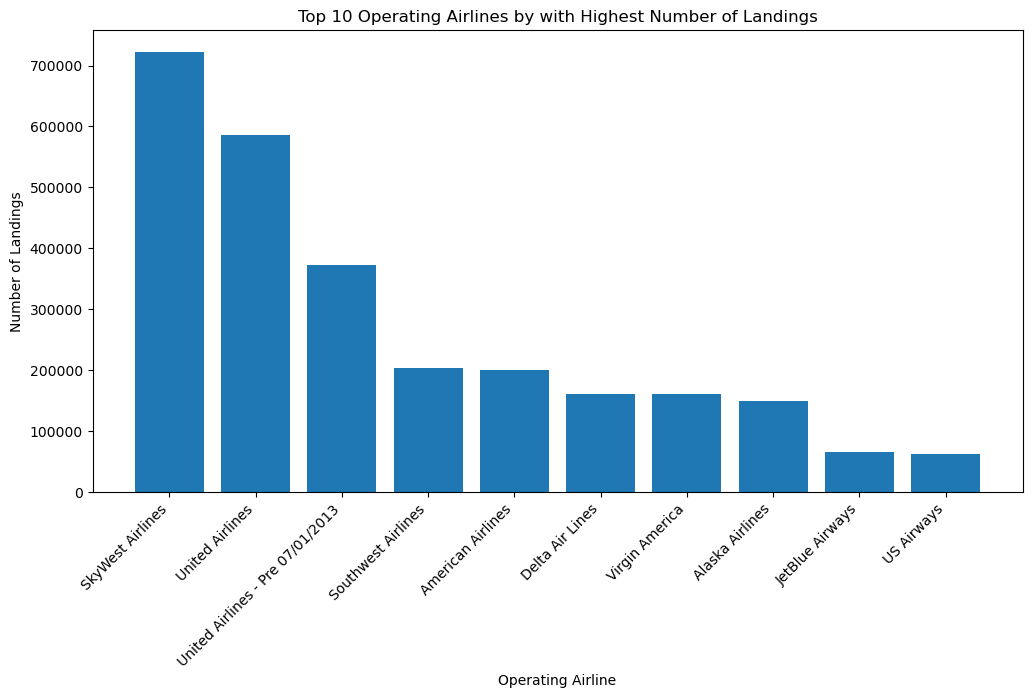

In [101]:
#Visualization
#Bar chart showing total number of landings by operating airline
import matplotlib.pyplot as plt

## group data by operating airline and sum the number of landings
airline_landing_counts = fetched_data.groupby('operating_airline')['landing_count'].sum()

# sort the values in descending order and take the top 10
top_10_airlines = airline_landing_counts.sort_values(ascending=False)[:10]

# create a bar chart showing the number of landings by airline
plt.figure(figsize=(12,6))
plt.bar(top_10_airlines.index, top_10_airlines.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Operating Airline')
plt.ylabel('Number of Landings')
plt.title('Top 10 Operating Airlines by with Highest Number of Landings')
plt.show()

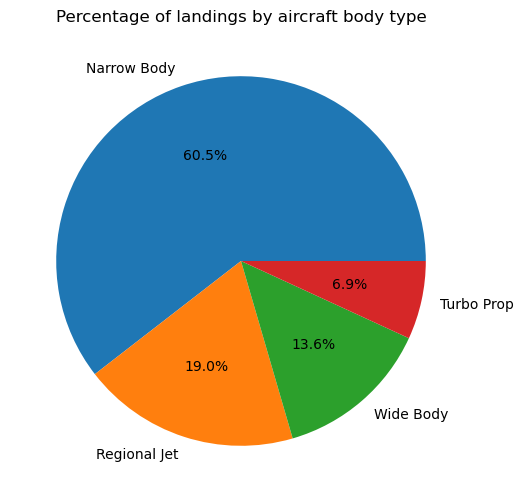

In [102]:
#Pie chart showing percentage of landings by aircraft body type
# Create a groupby object to aggregate landings by aircraft body type
landings_by_body_type = fetched_data.groupby('aircraft_body_type')['landing_count'].sum()

# Sort the values in descending order
landings_by_body_type = landings_by_body_type.sort_values(ascending=False)

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(landings_by_body_type.values, labels=landings_by_body_type.index, autopct='%1.1f%%')
plt.title('Percentage of landings by aircraft body type')
plt.show()


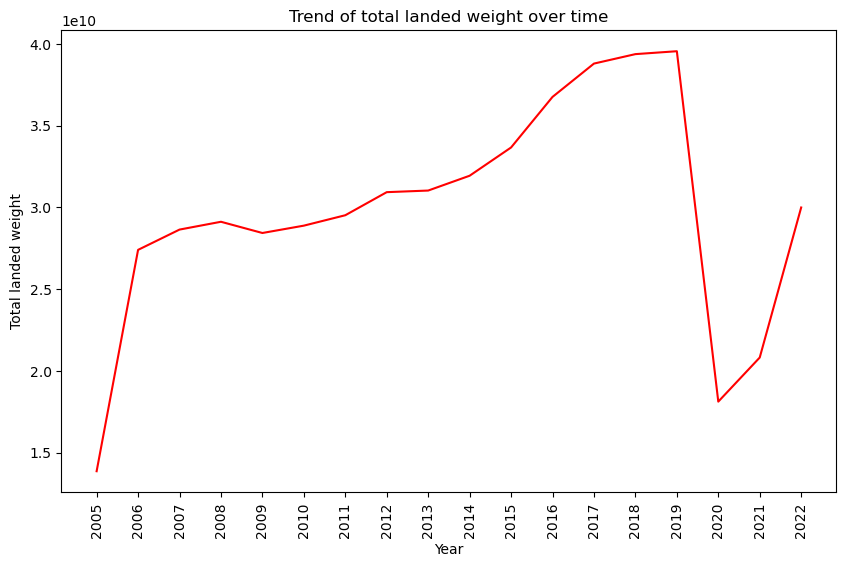

In [103]:
#Line chart showing trend of total landed weight over time
# Create a groupby object to aggregate total landed weight by year and month
landed_weight_by_year = fetched_data.groupby(['Year'])['total_landed_weight'].sum()

# Create a line chart
plt.figure(figsize=(10,6))
plt.plot(landed_weight_by_year.index, landed_weight_by_year.values, color='red')
plt.title('Trend of total landed weight over time')
plt.xlabel('Year')
plt.ylabel('Total landed weight')
plt.xticks(rotation=90)
plt.show()


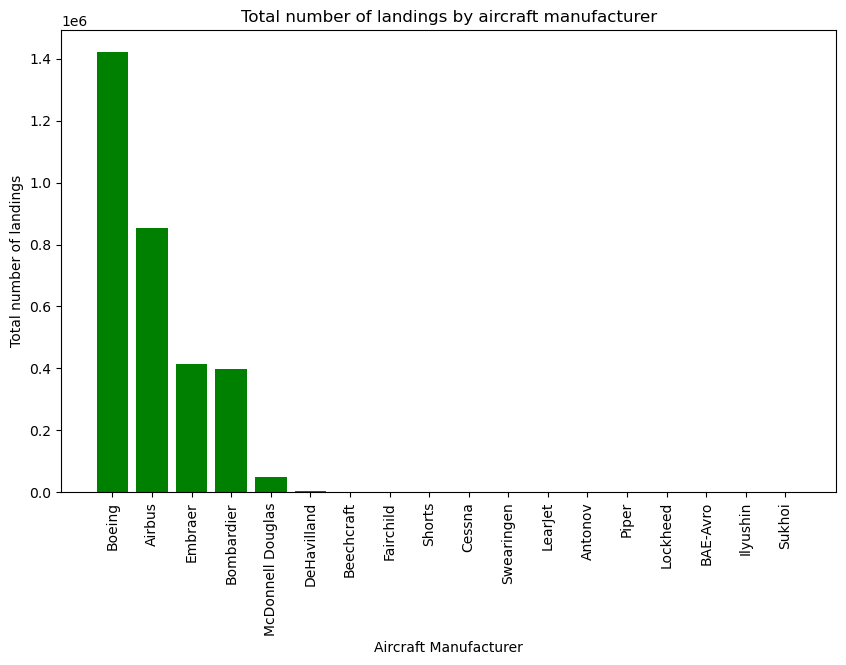

In [104]:
#Bar chart showing total number of landings by aircraft manufacturer
# Create a groupby object to aggregate landings by aircraft manufacturer
landings_by_manufacturer = fetched_data.groupby('aircraft_manufacturer')['landing_count'].sum()

# Sort the values in descending order
landings_by_manufacturer = landings_by_manufacturer.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10,6))
plt.bar(landings_by_manufacturer.index, landings_by_manufacturer.values, color='green')
plt.title('Total number of landings by aircraft manufacturer')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Total number of landings')
plt.xticks(rotation=90)
plt.show()

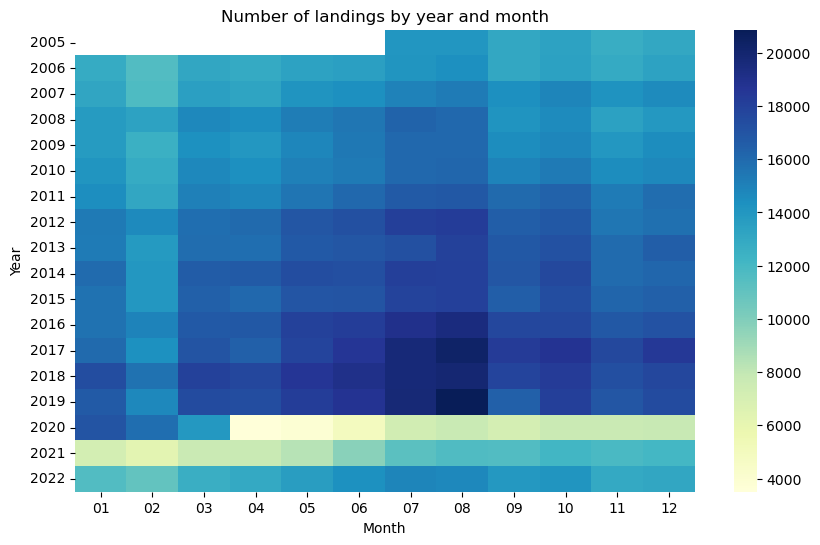

In [105]:
#Heatmap of the number of landings by year and month
import seaborn as sns
# Create a pivot table to aggregate landings by year and month
landings_by_date = pd.pivot_table(fetched_data, values='landing_count', index='Year', columns='Month', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(landings_by_date, cmap='YlGnBu')
plt.title('Number of landings by year and month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


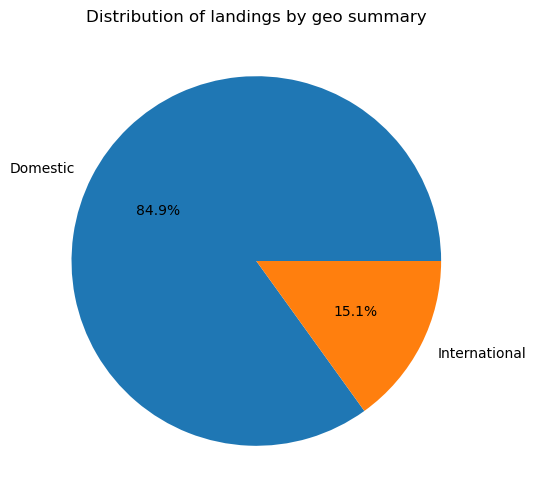

In [106]:
#Pie chart showing the distribution of landings by geo summary
landings_by_geo_summary = fetched_data.groupby(['geo_summary'])['landing_count'].sum()

plt.figure(figsize=(6,6))
plt.pie(landings_by_geo_summary.values, labels=landings_by_geo_summary.index, autopct='%1.1f%%')
plt.title('Distribution of landings by geo summary')
plt.show()

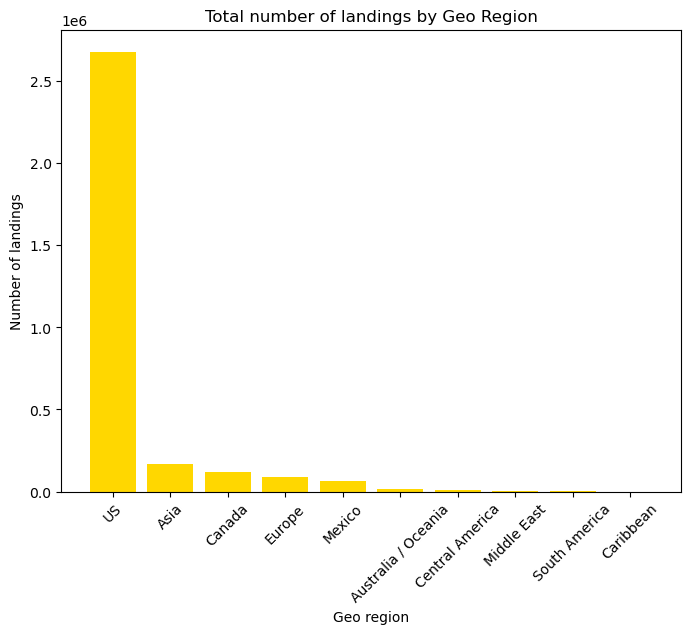

In [107]:
#Bar chart showing the total number of landings by geo region
#Creating a groupby object to aggregate total landings by geo region
landings_by_region = fetched_data.groupby(['geo_region'])['landing_count'].sum()

#Sorting the values in descending order
landings_by_region = landings_by_region.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(8,6))
plt.bar(landings_by_region.index, landings_by_region.values,color='gold')
plt.title('Total number of landings by Geo Region')
plt.xlabel('Geo region')
plt.ylabel('Number of landings')
plt.xticks(rotation=45)
plt.show()

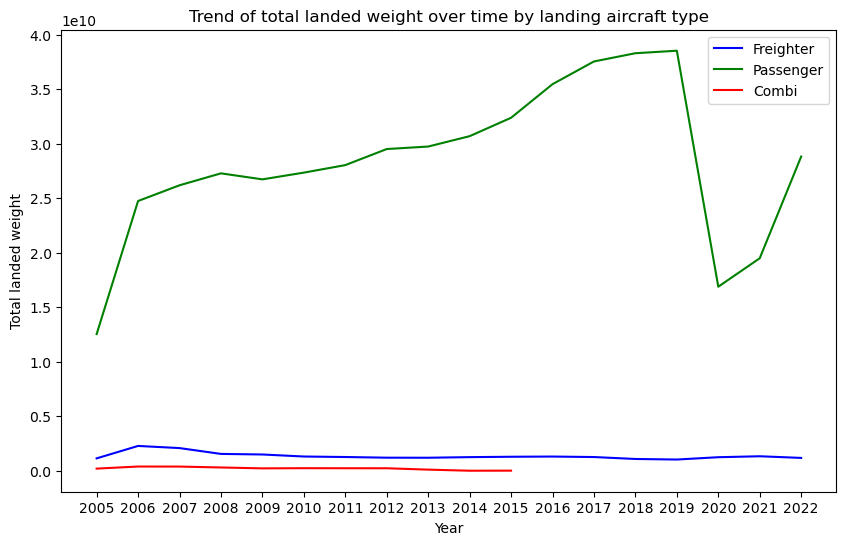

In [108]:
#line chart showing the trend of total landed weight over time by landing aircraft type
#Creating a groupby object to aggregate total landed weight by landing aircraft type and year
landed_weight_by_aircraft_and_year = fetched_data.groupby(['landing_aircraft_type', 'Year'])['total_landed_weight'].sum()

#Creating a line chart for each aircraft type
aircraft_types = fetched_data['landing_aircraft_type'].unique()
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
plt.figure(figsize=(10, 6))
for i, aircraft_type in enumerate(aircraft_types):
    subset = landed_weight_by_aircraft_and_year.loc[aircraft_type]
    plt.plot(subset.index, subset.values, label=aircraft_type, color=colors[i])
plt.title('Trend of total landed weight over time by landing aircraft type')
plt.xlabel('Year')
plt.ylabel('Total landed weight')
plt.legend()
plt.show()

In [109]:
fetched_data.to_csv('mydata.csv', index=False)